In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import OrderedDict

from my_utils import get_colors
from sklearn.utils import shuffle
import snmcseq_utils

In [3]:
f_tsne =  './data/tsne/tsne_perp30_binc_mCH_human_combined_100000_summary_nmcc_v3.tsv'
f_meta =  './data/metadata/metadata_human_combined_updated.tsv'
df_tsne = pd.read_table(f_tsne, index_col='sample')
df_tsne = df_tsne[~df_tsne.tsne_x.isnull()]
df_meta = pd.read_table(f_meta, index_col='Sample')
df = pd.merge(df_tsne, df_meta, left_index=True, right_index=True)

print(df.shape)
df.iloc[0, -2] = np.nan
df.head()

(6435, 18)


,tsne_x,tsne_y,Library pool,Layer,Total reads,Mapped reads,Mapping rate,Nonclonal reads,Nonclonal rates,Lambda mC/C,mCCC/CCC,mCG/CG,mCH/CH,Estimated mCG/CG,Estimated mCH/CH,% Genome covered,Biosample,allc file location (Mukamel lab)
160729_MB_v1_hs_25yr_MFG_pool_1000_AD008_indexed,-4.877054,69.676521,K1K2,NaN,6947874.0,3881291.0,55.90%,1968317.0,50.70%,NaN,0.00772,0.81781,0.03853,0.81639,0.03105,6.94,NaN,NaN
160729_MB_v1_hs_25yr_MFG_pool_1000_AD010_indexed,-9.039734,42.487274,K1K2,NaN,6279206.0,3401310.0,54.20%,1644218.0,48.30%,NaN,0.00920,0.81549,0.04995,0.81378,0.04113,5.85,MB_v1,NaN
160729_MB_v1_hs_25yr_MFG_pool_1001_AD008_indexed,-16.972353,44.029213,K1K2,NaN,8187228.0,4875693.0,59.60%,2356884.0,48.30%,NaN,0.00960,0.82092,0.05180,0.81918,0.04261,8.09,MB_v1,NaN
160729_MB_v1_hs_25yr_MFG_pool_1001_AD010_indexed,1.754878,-44.023613,K1K2,NaN,6914304.0,4073625.0,58.90%,1771526.0,43.50%,NaN,0.00795,0.76225,0.04268,0.76034,0.03501,6.14,MB_v1,NaN
160729_MB_v1_hs_25yr_MFG_pool_1002_AD010_indexed,32.351906,-0.929139,K1K2,NaN,5434304.0,3130053.0,57.60%,1529438.0,48.90%,NaN,0.00694,0.76642,0.03557,0.76479,0.02883,5.43,MB_v1,NaN


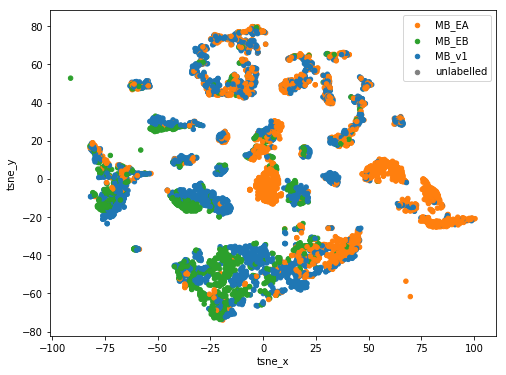

In [5]:
snmcseq_utils.plot_tsne_labels(df, tc='Biosample', s=20, legend_mode=0, random_state=1)
# plot_tsne_labels(df, tc='Biosample', s=20, legend_mode=0, random_state=1)

In [5]:
df.head()

,tsne_x,tsne_y,Library pool,Layer,Total reads,Mapped reads,Mapping rate,Nonclonal reads,Nonclonal rates,Lambda mC/C,mCCC/CCC,mCG/CG,mCH/CH,Estimated mCG/CG,Estimated mCH/CH,% Genome covered,Biosample,allc file location (Mukamel lab)
160729_MB_v1_hs_25yr_MFG_pool_1000_AD008_indexed,-4.877054,69.676521,K1K2,NaN,6947874.0,3881291.0,55.90%,1968317.0,50.70%,NaN,0.00772,0.81781,0.03853,0.81639,0.03105,6.94,NaN,NaN
160729_MB_v1_hs_25yr_MFG_pool_1000_AD010_indexed,-9.039734,42.487274,K1K2,NaN,6279206.0,3401310.0,54.20%,1644218.0,48.30%,NaN,0.00920,0.81549,0.04995,0.81378,0.04113,5.85,MB_v1,NaN
160729_MB_v1_hs_25yr_MFG_pool_1001_AD008_indexed,-16.972353,44.029213,K1K2,NaN,8187228.0,4875693.0,59.60%,2356884.0,48.30%,NaN,0.00960,0.82092,0.05180,0.81918,0.04261,8.09,MB_v1,NaN
160729_MB_v1_hs_25yr_MFG_pool_1001_AD010_indexed,1.754878,-44.023613,K1K2,NaN,6914304.0,4073625.0,58.90%,1771526.0,43.50%,NaN,0.00795,0.76225,0.04268,0.76034,0.03501,6.14,MB_v1,NaN
160729_MB_v1_hs_25yr_MFG_pool_1002_AD010_indexed,32.351906,-0.929139,K1K2,NaN,5434304.0,3130053.0,57.60%,1529438.0,48.90%,NaN,0.00694,0.76642,0.03557,0.76479,0.02883,5.43,MB_v1,NaN
